In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 10 # unit: kg
k = 1  # unit: N/m
b = 2  # unit: N/(m^2)

In [3]:
x = [0]  # unit: m
vx = [1] # unit: m/s

In [4]:
t = [0]      # unit: s
dt = 1e-3    # unit: s
t_end = 3600 # unit: s
for t_now in tqdm.tqdm(np.arange(dt, t_end + dt, dt)):
    x.append(x[-1] + vx[-1] * dt)
    vx.append(vx[-1] - (k * x[-1] + b * vx[-1]) / m * dt)
    t.append(t_now)

100%|██████████| 3600000/3600000 [00:01<00:00, 2729426.24it/s]


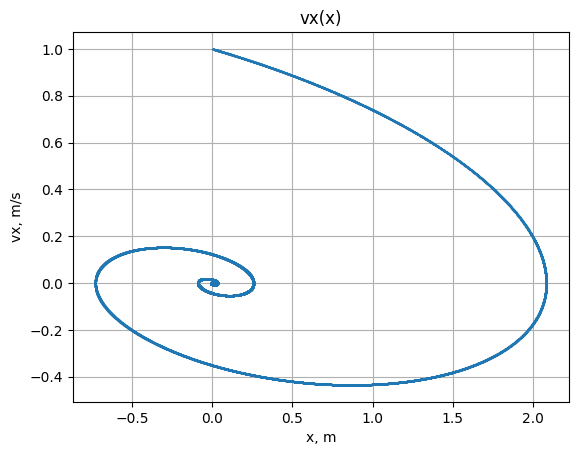

In [5]:
plt.plot(x, vx, linestyle='', marker='.', markersize=0.5)
plt.title('vx(x)')
plt.xlabel('x, m')
plt.ylabel('vx, m/s')
plt.grid()

In [6]:
x_st = x[-1]
vx_st = vx[-1]
x_st, vx_st

(-8.886266719359033e-157, 4.324799076862362e-157)

In [7]:
def find_next_ksi(ksi):
    global dt
    x = [x_st, x_st]
    vx = [ksi, ksi]
    while not (x[-2] < x_st and x[-1] >= x_st):
        x.append(x[-1] + vx[-1] * dt)
        vx.append(vx[-1] - (k * x[-1] + b * vx[-1]) / m * dt)
    return vx[-1]

In [8]:
dots_ksi = []
dots_phi_ksi = []
for ksi in tqdm.tqdm(np.arange(vx_st + 1e-3, vx_st + 2 + 1e-3, 1e-3)):
    dots_ksi.append(ksi)
    dots_phi_ksi.append(find_next_ksi(ksi))

100%|██████████| 2000/2000 [00:13<00:00, 150.32it/s]


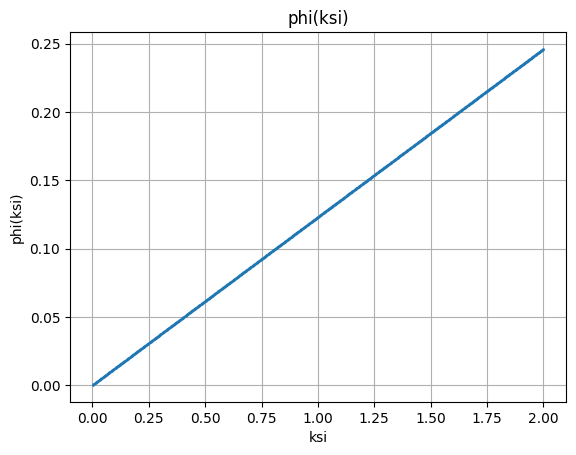

In [9]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='', marker='.', markersize=1)
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()

In [10]:
dots_ksi = [2]
dots_phi_ksi = [find_next_ksi(2)]
for i in tqdm.tqdm(range(100)):
    dots_ksi.append(dots_phi_ksi[-1])
    dots_phi_ksi.append(find_next_ksi(dots_ksi[-1]))

100%|██████████| 100/100 [00:00<00:00, 374.54it/s]


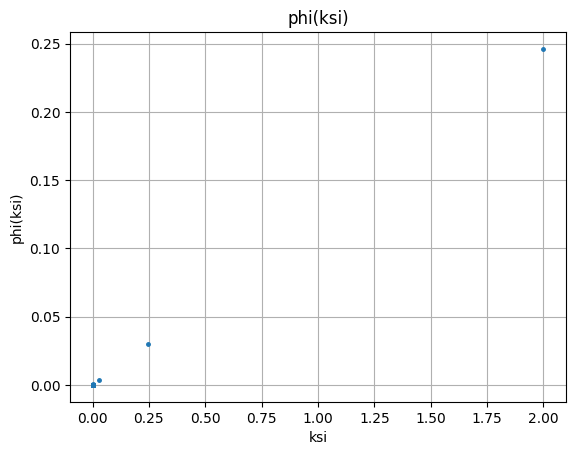

In [11]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='', marker='.', markersize=5)
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()

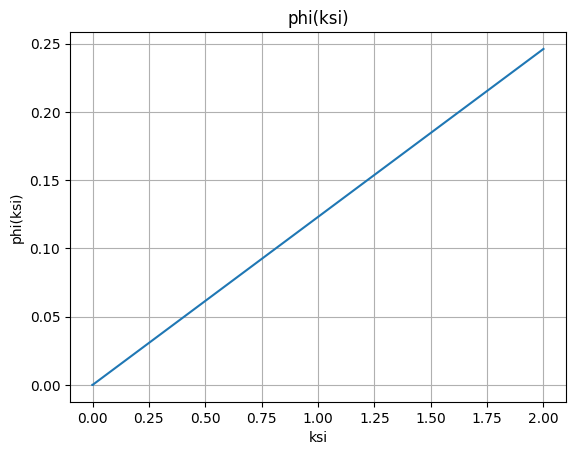

In [12]:
plt.plot(dots_ksi, dots_phi_ksi, linestyle='-')
plt.title('phi(ksi)')
plt.xlabel('ksi')
plt.ylabel('phi(ksi)')
plt.grid()